The numbers, what do they mean??

In [47]:
save_file = "wiki_arithmetic_code_gpt2-xl_test_1"
with open(f'{save_file}.txt','r', encoding="utf8") as f:
    code = f.read()

## n-grams/serial test
 Divide the sequence to blocks of n-grams, like $x_{1:n}, x_{n+1:2n}, \dots$ , then run the equidistribution test.

1


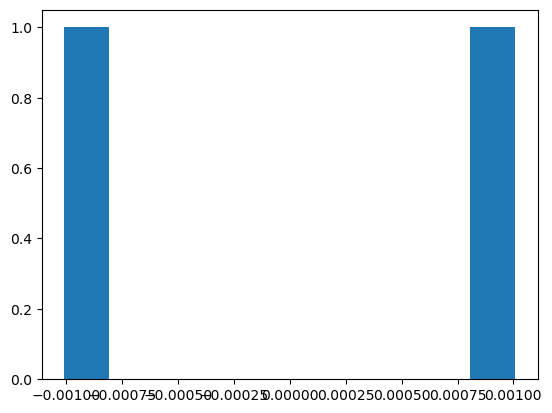

Chi-squared: 1.1113344022021627, p-value: 0.29179206298565497
The sequence could be random.
2


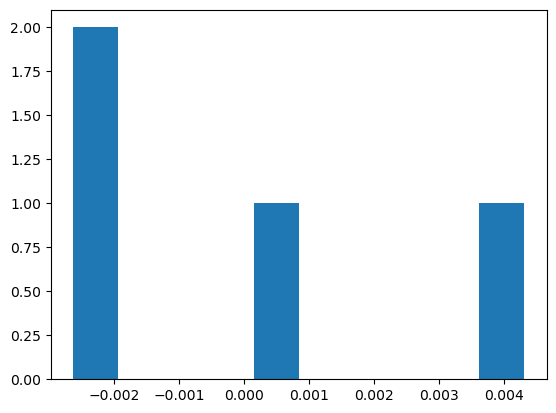

Chi-squared: 4.019752110283836, p-value: 0.25933914286373994
The sequence could be random.
3


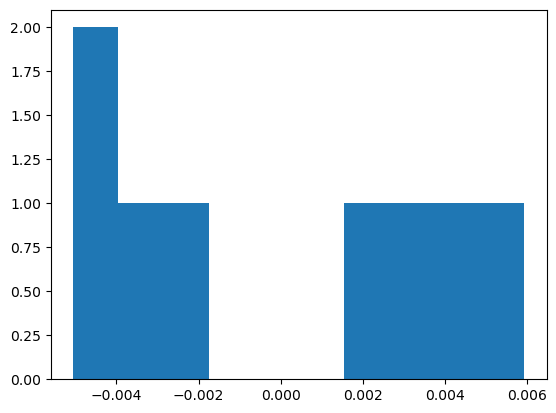

Chi-squared: 5.833959280490215, p-value: 0.5592655461740554
The sequence could be random.
4


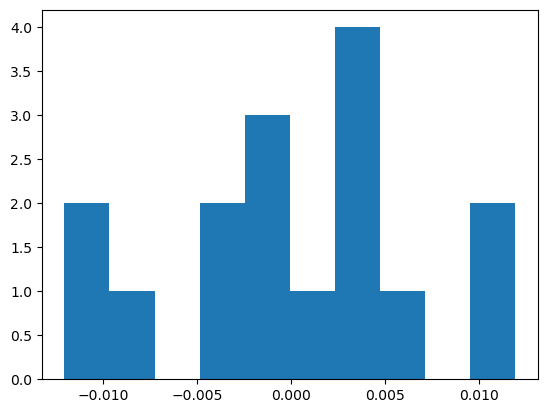

Chi-squared: 12.126756129523475, p-value: 0.6694103327174501
The sequence could be random.
5


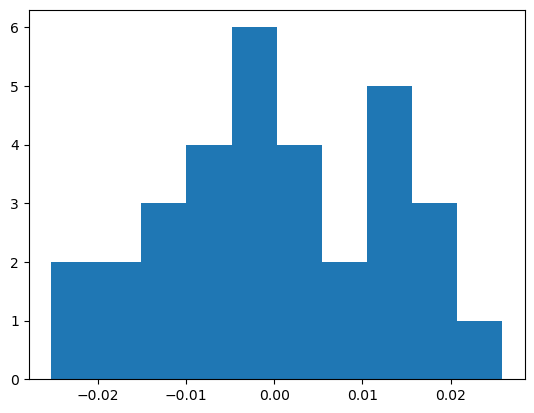

Chi-squared: 36.137196405366325, p-value: 0.2409651743552528
The sequence could be random.
6


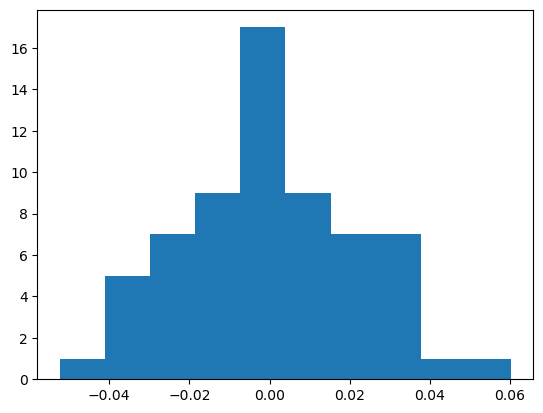

Chi-squared: 86.5020315828776, p-value: 0.026413858162139498
The sequence is likely not random.
7


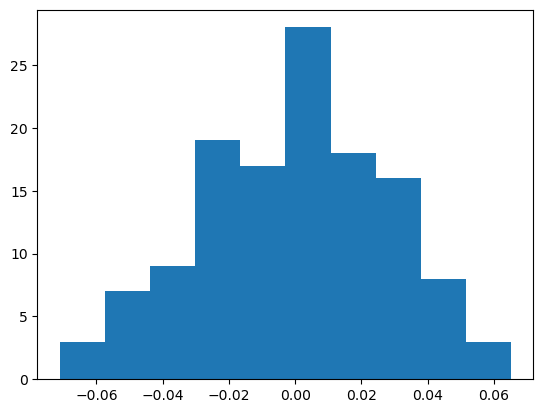

Chi-squared: 127.61070042150845, p-value: 0.4680840617611699
The sequence could be random.


In [46]:
from scipy.stats import chisquare
from collections import Counter
import matplotlib.pyplot as plt

def serial_test(bit_string, n):
    # Split the string into n-bit segments
    segments = [bit_string[i:i+n] for i in range(0, len(bit_string), n)]
    
    # If the last segment is shorter than n, discard it as it doesn't form a complete segment
    if len(segments[-1]) < n:
        segments.pop()
    
    # Count occurrences of each segment
    segment_counts = Counter(segments)
    
    # Calculate the expected count for each segment (assuming uniform distribution)
    expected_count = len(segments) / (2**n)
    
    # Chi-square test requires observed and expected counts in the same order
    observed_counts = [segment_counts.get(bin(i)[2:].zfill(n), 0) for i in range(2**n)]
    expected_counts = [expected_count] * (2**n)
    
    plt.hist([observed_counts[i] / expected_counts[i] - 1 for i in range(len(expected_counts))])
    plt.show()
    
    # Perform the chi-square test
    chi2, p = chisquare(observed_counts, f_exp=expected_counts)
    
    print(f"Chi-squared: {chi2}, p-value: {p}")
    
    if p < 0.05:
        print("The sequence is likely not random.")
    else:
        print("The sequence could be random.")

for n in range(1, 8):
    print(n)
    serial_test(code, n=n)

In [50]:
import numpy
from nistrng import *

def nist_test_suite(binary_sequence):
        print("Random sequence generated by NumPy:")
        print(sequence)
        print("Random sequence generated by NumPy encoded in 8-bit signed format:")
        print(binary_sequence)
        print("Original sequence taken back by unpacking (to check the correctness of packing process:")
        print(unpack_sequence(binary_sequence))
        # Check the eligibility of the test and generate an eligible battery from the default NIST-sp800-22r1a battery
        eligible_battery: dict = check_eligibility_all_battery(binary_sequence, SP800_22R1A_BATTERY)
        # Print the eligible tests
        print("Eligible test from NIST-SP800-22r1a:")
        for name in eligible_battery.keys():
            print("-" + name)
        # Test the sequence on the eligible tests
        results = run_all_battery(binary_sequence, eligible_battery, False)
        # Print results one by one
        print("Test results:")
        for result, elapsed_time in results:
            if result.passed:
                print("- PASSED - score: " + str(numpy.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
            else:
                print("- FAILED - score: " + str(numpy.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")

In [52]:
sequence: numpy.ndarray = numpy.random.randint(-128, 128, 10000, dtype=int)
binary_sequence: numpy.ndarray = pack_sequence(sequence)
nist_test_suite(binary_sequence)

Random sequence generated by NumPy:
[-10 -63   3 ... 111  29  58]
Random sequence generated by NumPy encoded in 8-bit signed format:
[1 1 1 ... 0 1 0]
Original sequence taken back by unpacking (to check the correctness of packing process:
[-10 -63   3 ... 111  29  58]
Eligible test from NIST-SP800-22r1a:
-monobit
-frequency_within_block
-runs
-longest_run_ones_in_a_block
-binary_matrix_rank
-dft
-non_overlapping_template_matching
-serial
-approximate_entropy
-cumulative sums
-random_excursion
-random_excursion_variant
Test results:
- PASSED - score: 0.493 - Monobit - elapsed time: 1 ms
- PASSED - score: 0.499 - Frequency Within Block - elapsed time: 1 ms
- PASSED - score: 0.446 - Runs - elapsed time: 24 ms
- PASSED - score: 0.549 - Longest Run Ones In A Block - elapsed time: 16 ms
- PASSED - score: 0.389 - Binary Matrix Rank - elapsed time: 447 ms
- FAILED - score: 0.0 - Discrete Fourier Transform - elapsed time: 2 ms
- PASSED - score: 0.062 - Non Overlapping Template Matching - elapse

In [58]:
binary_sequence = numpy.array([int(i) for i in code], dtype=int)
binary_sequence[:10]

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [59]:
nist_test_suite(binary_sequence)

Random sequence generated by NumPy:
[-10 -63   3 ... 111  29  58]
Random sequence generated by NumPy encoded in 8-bit signed format:
[1 0 0 ... 1 1 0]
Original sequence taken back by unpacking (to check the correctness of packing process:
[-122  -72   38 ...  -37   75   78]
Eligible test from NIST-SP800-22r1a:
-monobit
-frequency_within_block
-runs
-longest_run_ones_in_a_block
-binary_matrix_rank
-dft
-non_overlapping_template_matching
-overlapping_template_matching
-maurers_universal
-linear_complexity
-serial
-approximate_entropy
-cumulative sums
-random_excursion
-random_excursion_variant
Test results:
- PASSED - score: 0.292 - Monobit - elapsed time: 1 ms
- PASSED - score: 0.063 - Frequency Within Block - elapsed time: 0 ms
- PASSED - score: 0.959 - Runs - elapsed time: 238 ms
- PASSED - score: 0.281 - Longest Run Ones In A Block - elapsed time: 110 ms
- PASSED - score: 0.209 - Binary Matrix Rank - elapsed time: 2467 ms
- FAILED - score: 0.0 - Discrete Fourier Transform - elapsed t